In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 1. Load the dataset
file_path = '/content/lakes_fe.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# 2. Check the first few rows
print("First few rows of the dataset:")
print(data.head())

# 3. Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# 4. Summary statistics
summary_stats = data.describe()
print("\nSummary statistics for numerical columns:")
print(summary_stats)




First few rows of the dataset:
   Date  Mean_Rainfall  Mean_Temp  Actual_Flow_Rate  Actual_Lake_Level
0     0       2.857312  14.530141          2.578255         249.606745
1     1       2.857312  14.530141          2.578255         249.606745
2     2       2.857312  14.530141          2.578255         249.606745
3     3       2.857312  14.530141          2.578255         249.606745
4     4       2.857312  14.530141          2.578255         249.606745

Missing values in each column:
Date                 0
Mean_Rainfall        0
Mean_Temp            0
Actual_Flow_Rate     0
Actual_Lake_Level    0
dtype: int64

Summary statistics for numerical columns:
              Date  Mean_Rainfall    Mean_Temp  Actual_Flow_Rate  \
count  6603.000000    6603.000000  6603.000000       6603.000000   
mean   3301.000000       2.857312    14.530707          2.753534   
std    1906.266246       6.996140     6.633255          3.670228   
min       0.000000       0.000000    -5.350000          0.450000   



Data types of the columns:
Date                   int64
Mean_Rainfall        float64
Mean_Temp            float64
Actual_Flow_Rate     float64
Actual_Lake_Level    float64
dtype: object


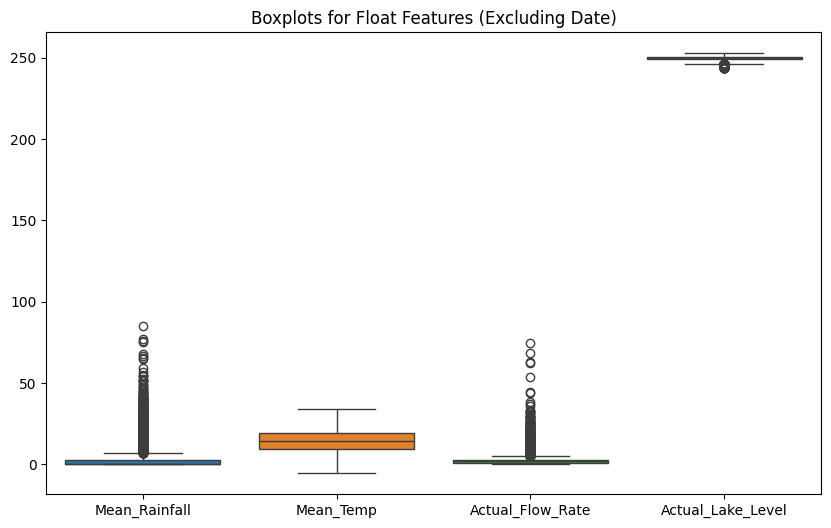

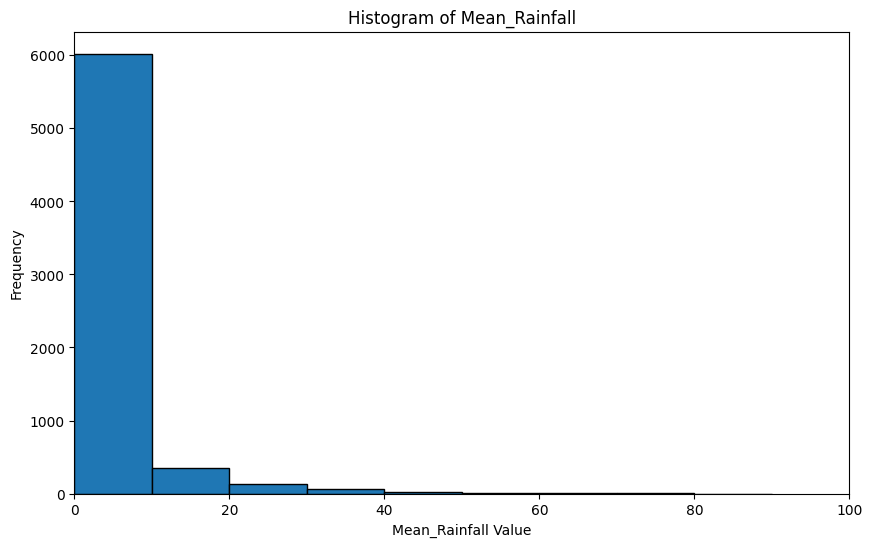

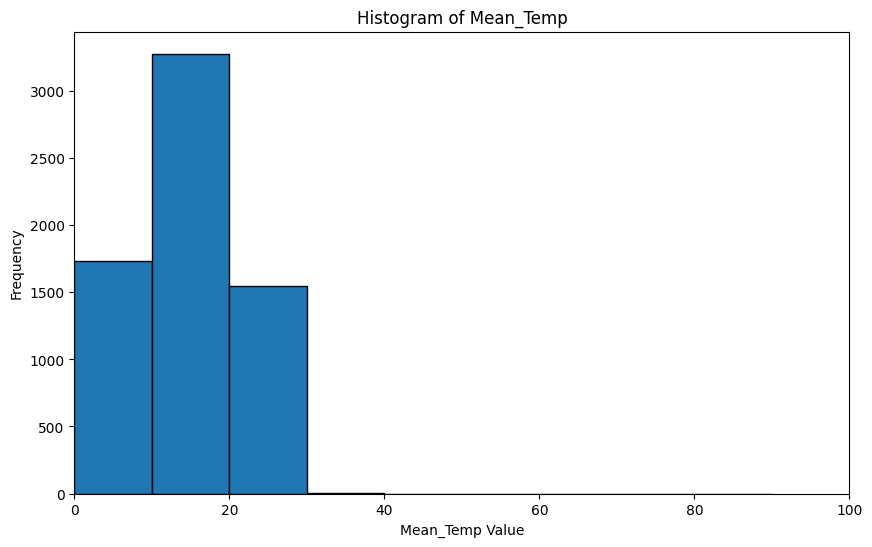

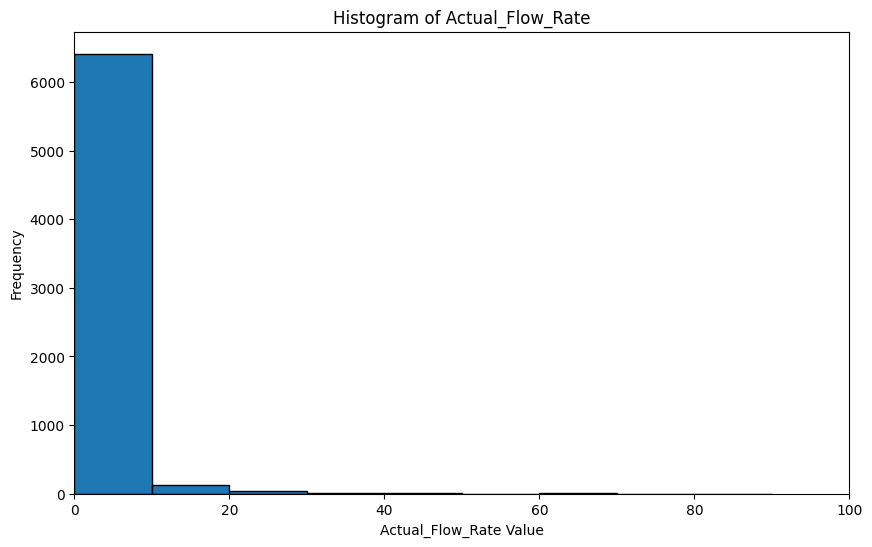

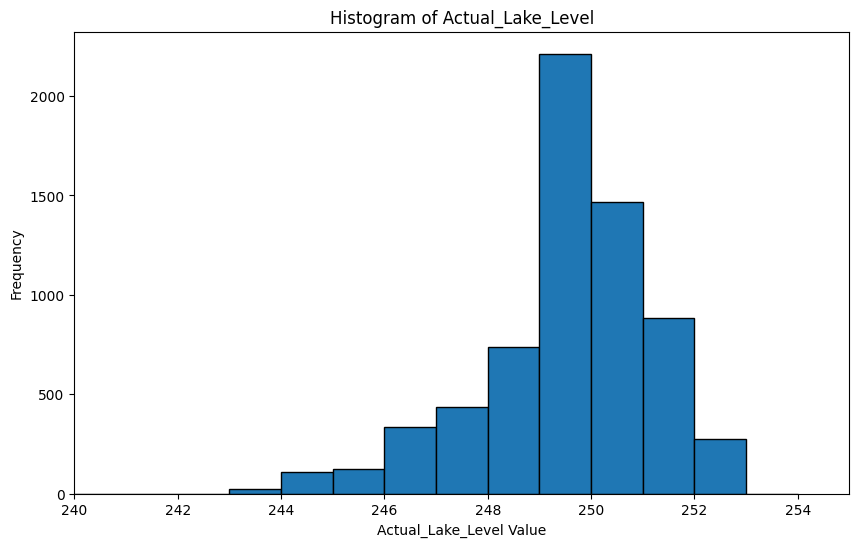

In [ ]:
# 5. Check data types
data_types = data.dtypes
print("\nData types of the columns:")
print(data_types)

# Select only float64 columns (excluding 'Date')
float_columns = data.select_dtypes(include=['float64']).columns
#float_columns = float_columns[float_columns != 'Date']  # Exclude the 'Date' column

# Boxplots to identify outliers (excluding 'Date')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[float_columns])
plt.title("Boxplots for Float Features (Excluding Date)")
plt.show()


# Select only float64 columns (excluding 'Date')
float_columns = data.select_dtypes(include=['float64']).columns
float_columns = float_columns[float_columns != 'Date']  # Exclude the 'Date' column

# Select only float64 columns (excluding 'Date')
float_columns = data.select_dtypes(include=['float64']).columns
float_columns = float_columns[float_columns != 'Date']  # Exclude the 'Date' column

# Define bin edges with a bin size of 50
bins = np.arange(0, 100, 10)  # Bins: 0-50, 50-100, 100-150, etc.

# Plot histogram for the first float column (e.g., 'Mean_Rainfall')
plt.figure(figsize=(10, 6))
plt.hist(data[float_columns[0]], bins=bins, edgecolor='black')

# Adding titles and labels
plt.title(f"Histogram of {float_columns[0]}")
plt.xlabel(f"{float_columns[0]} Value")
plt.ylabel("Frequency")

# Set x-axis and y-axis limits for clarity
plt.xlim([0, 100])  # Set x-axis limits between 0 and 250
plt.ylim(bottom=0)  # Ensure y-axis starts from 0

plt.show()
# Define bin edges with a bin size of 50
bins = np.arange(0, 100, 10)  # Bins: 0-50, 50-100, 100-150, etc.

# Plot histogram for the second float column (e.g., 'Mean_Temp')
plt.figure(figsize=(10, 6))
plt.hist(data[float_columns[1]], bins=bins, edgecolor='black')

# Adding titles and labels
plt.title(f"Histogram of {float_columns[1]}")
plt.xlabel(f"{float_columns[1]} Value")
plt.ylabel("Frequency")

# Set x-axis and y-axis limits for clarity
plt.xlim([0, 100])  # Set x-axis limits between 0 and 250
plt.ylim(bottom=0)  # Ensure y-axis starts from 0

plt.show()

# Define bin edges with a bin size of 50
bins = np.arange(0, 100, 10)  # Bins: 0-50, 50-100, 100-150, etc.

# Plot histogram for the third float column (e.g., 'Actual_Flow_Rate')
plt.figure(figsize=(10, 6))
plt.hist(data[float_columns[2]], bins=bins, edgecolor='black')

# Adding titles and labels
plt.title(f"Histogram of {float_columns[2]}")
plt.xlabel(f"{float_columns[2]} Value")
plt.ylabel("Frequency")

# Set x-axis and y-axis limits for clarity
plt.xlim([0, 100])  # Set x-axis limits between 0 and 250
plt.ylim(bottom=0)  # Ensure y-axis starts from 0

plt.show()


# Define bin edges with a smaller bin size suitable for lake level range
bins = np.arange(240, 255, 1)  # Bin size of 1 to show detailed lake level distribution

# Plot histogram for the fourth float column (e.g., 'Actual_Lake_Level')
plt.figure(figsize=(10, 6))
plt.hist(data[float_columns[3]], bins=bins, edgecolor='black')

# Adding titles and labels
plt.title(f"Histogram of {float_columns[3]}")
plt.xlabel(f"{float_columns[3]} Value")
plt.ylabel("Frequency")

# Set x-axis and y-axis limits for clarity
plt.xlim([240, 255])  # Adjusted based on lake level data range
plt.ylim(bottom=0)    # Start y-axis from 0

plt.show()


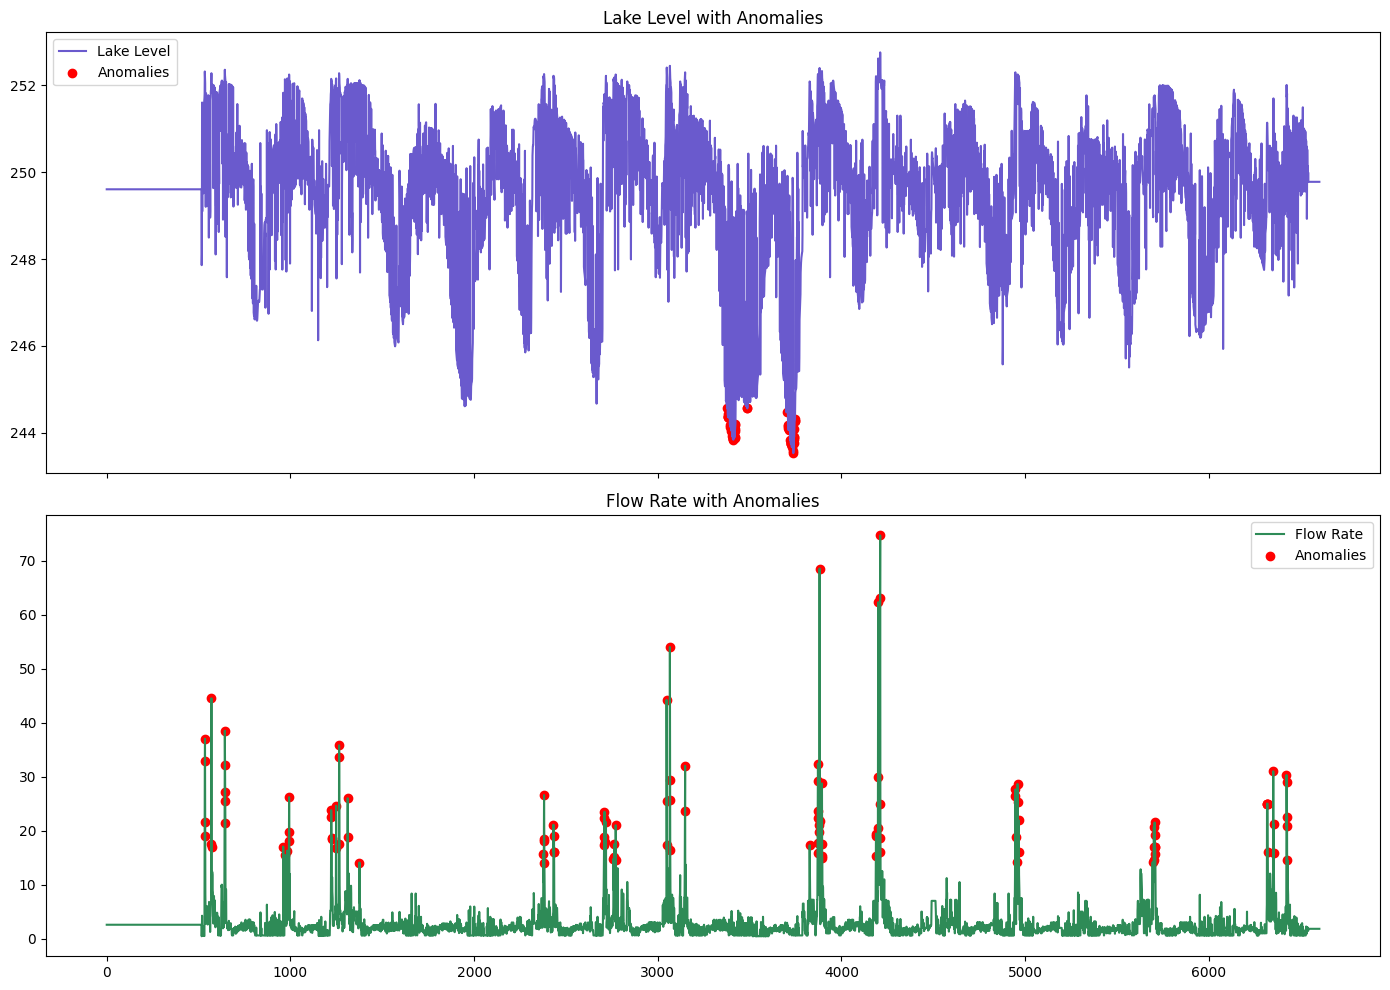

In [ ]:
# 3. Detect anomalies using Z-score method
from scipy.stats import zscore

# Calculate Z-scores
data['Lake_Level_Z'] = zscore(data['Actual_Lake_Level'])
data['Flow_Rate_Z'] = zscore(data['Actual_Flow_Rate'])
# Define anomaly threshold (e.g., beyond ±3 standard deviations)
threshold = 3
lake_level_anomalies = data[np.abs(data['Lake_Level_Z']) > threshold]
flow_rate_anomalies = data[np.abs(data['Flow_Rate_Z']) > threshold]

# Plot anomalies
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].plot(data.index, data['Actual_Lake_Level'], label='Lake Level', color='slateblue')
axs[0].scatter(lake_level_anomalies.index, lake_level_anomalies['Actual_Lake_Level'],
               color='red', label='Anomalies')
axs[0].set_title('Lake Level with Anomalies')
axs[0].legend()

axs[1].plot(data.index, data['Actual_Flow_Rate'], label='Flow Rate', color='seagreen')
axs[1].scatter(flow_rate_anomalies.index, flow_rate_anomalies['Actual_Flow_Rate'],
               color='red', label='Anomalies')
axs[1].set_title('Flow Rate with Anomalies')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# OUTLIER DETECTION USING IQR METHOD
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_info[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Outlier Count': outliers.shape[0]
        }
    return pd.DataFrame(outlier_info).T

# Select float64 columns excluding 'Date'
float_columns = data.select_dtypes(include='float64').columns
float_columns = float_columns[float_columns != 'Date']

# Detect and show outliers
outlier_summary = detect_outliers_iqr(data, float_columns)
print("Outlier Summary:")
print(outlier_summary)


Outlier Summary:
                           Q1          Q3        IQR  Lower Bound  \
Mean_Rainfall        0.000000    2.857312   2.857312    -4.285967   
Mean_Temp            9.500000   19.550000  10.050000    -5.575000   
Actual_Flow_Rate     1.166667    2.700000   1.533333    -1.133333   
Actual_Lake_Level  248.887143  250.626000   1.738857   246.278857   
Lake_Level_Z        -0.406616    0.645081   1.051697    -1.984161   
Flow_Rate_Z         -0.432395   -0.014587   0.417808    -1.059106   

                   Upper Bound  Outlier Count  
Mean_Rainfall         7.143279          763.0  
Mean_Temp            34.625000            0.0  
Actual_Flow_Rate      5.000000          656.0  
Actual_Lake_Level   253.234286          339.0  
Lake_Level_Z          2.222626          339.0  
Flow_Rate_Z           0.612124          656.0  


In [ ]:
# FUNCTION: Remove outliers using IQR
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Apply to your dataset
float_columns = data.select_dtypes(include='float64').columns
float_columns = float_columns[float_columns != 'Date']  # Exclude Date

data_cleaned = remove_outliers_iqr(data, float_columns)

# Show difference in rows
print("Original shape:", data.shape)
print("After outlier removal:", data_cleaned.shape)

data_cleaned.to_csv("cleaned_lakes_data.csv", index=False)


Original shape: (6603, 7)
After outlier removal: (4697, 7)


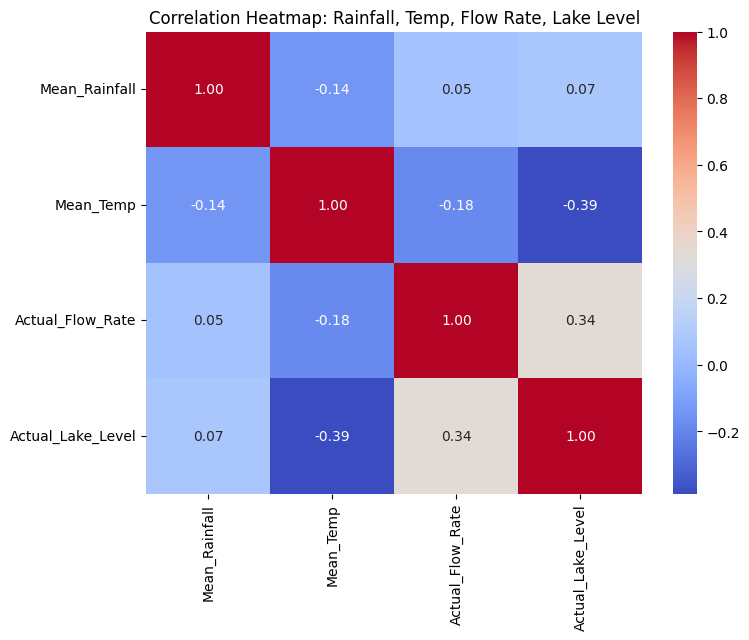

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the specified numerical columns
selected_cols = data[['Mean_Rainfall', 'Mean_Temp', 'Actual_Flow_Rate', 'Actual_Lake_Level']]

# Compute the correlation matrix
corr_matrix = selected_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Rainfall, Temp, Flow Rate, Lake Level')
plt.show()



In [ ]:
# Define feature columns (independent variables)
features = ['Mean_Rainfall', 'Mean_Temp', 'Actual_Flow_Rate']

# Define target column (dependent variable)
target = 'Actual_Lake_Level'

# Create X (features) and y (target) datasets
X = data_cleaned[features]
y = data_cleaned[target]

print (features)
print (target)

['Mean_Rainfall', 'Mean_Temp', 'Actual_Flow_Rate']
Actual_Lake_Level


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on the target series
result = adfuller(data_cleaned['Actual_Lake_Level'])

# Extract results
adf_stat = result[0]
p_value = result[1]

# Print conclusion only
print("ADF Statistic:", adf_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("The series is stationary (reject H₀)")
else:
    print("❌ The series is non-stationary (fail to reject H₀)")


ADF Statistic: -6.038648255026823
p-value: 1.3626932373332123e-07
The series is stationary (reject H₀)


In [ ]:
# Generate daily dates starting from 2012
date_range = pd.date_range(start="2012-01-01", periods=4697, freq='D')  # Daily

# Assign to your dataframe
df = pd.read_csv("cleaned_lakes_data.csv")
df = df.iloc[:len(date_range)]  # Trim to 6602 if needed
df['Date'] = date_range

# Save
df.to_csv("cleaned_lakes_data_2012_daily.csv", index=False)

print(" Date column now has 6602 daily dates from 2012.")


 Date column now has 6602 daily dates from 2012.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


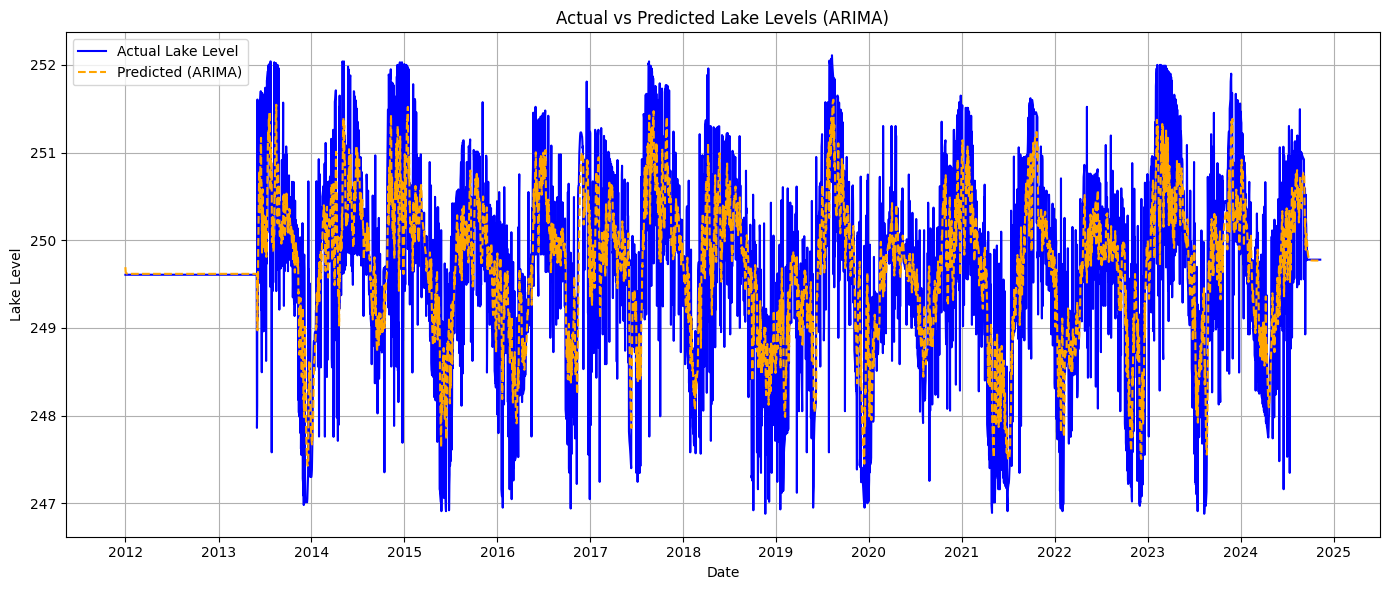

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates

# Load the updated dataset with daily dates from 2012
data = pd.read_csv("cleaned_lakes_data_2012_daily.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Target variable
lake_series = data['Actual_Lake_Level']

# Fit ARIMA model
model = ARIMA(lake_series, order=(1, 0, 1))
model_fit = model.fit()

# Predict
predicted = model_fit.predict(start=0, end=len(lake_series)-1)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(lake_series.index, lake_series, label='Actual Lake Level', color='blue')
plt.plot(lake_series.index, predicted, label='Predicted (ARIMA)', color='orange', linestyle='--')
plt.title('Actual vs Predicted Lake Levels (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Lake Level')

# Format x-axis to show years only
plt.gca().xaxis.set_major_locator(mdates.YearLocator())   # every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format as 'YYYY'

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




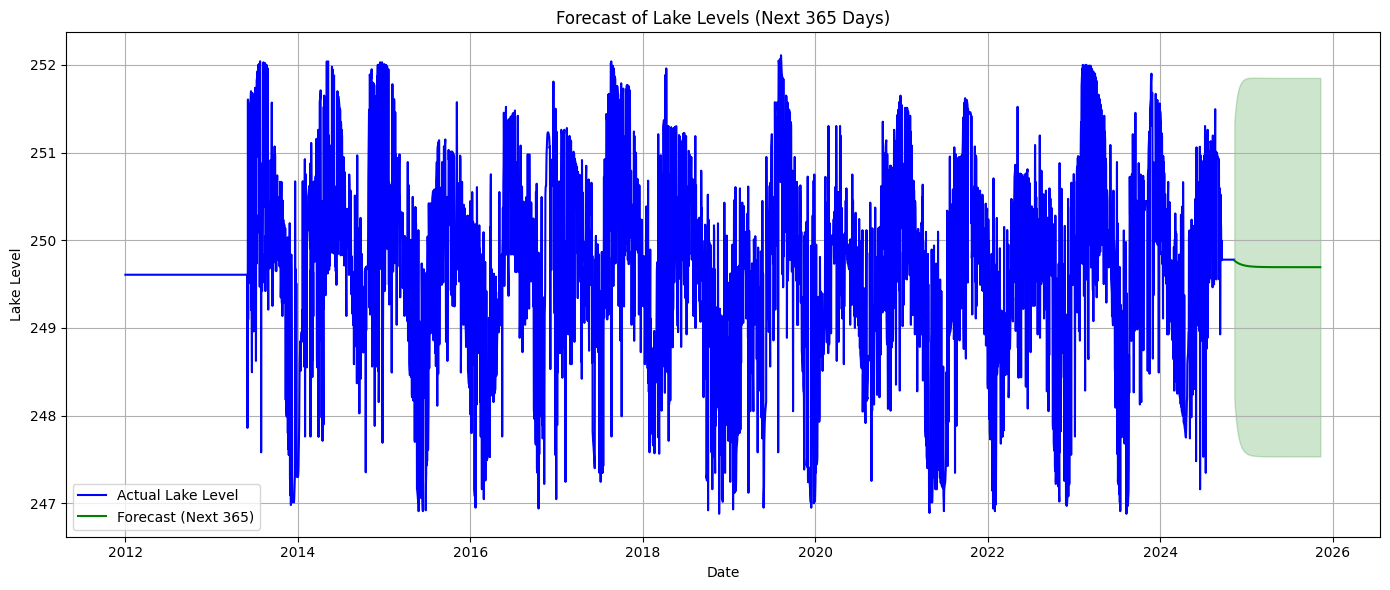

In [ ]:

# Assume lake_series and model_fit are already defined as before
# (If not, load and fit ARIMA as in your previous code)

# Forecast for next 365 days
forecast_steps = 365
forecast_365 = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_365.predicted_mean
conf_int = forecast_365.conf_int()

# Create datetime index for forecast
last_date = lake_series.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(lake_series.index, lake_series.values, label='Actual Lake Level', color='blue')
plt.plot(forecast_dates, forecast_mean.values, label='Forecast (Next 365)', color='green')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2)
plt.title("Forecast of Lake Levels (Next 365 Days)")
plt.xlabel("Date")
plt.ylabel("Lake Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define actual_future: real values you want to compare against the forecast
# Make sure this array has the same length as forecast_mean
# Replace the line below with your actual lake level values (e.g., from 2023)
# Example:
# actual_future = data['Actual_Lake_Level'].loc['2023-01-01':'2023-12-31'].values

# For now, let's assume we are comparing forecast to the tail of real data for demonstration
actual_future = lake_series[-365:].values

# Predicted values
predicted_forecast = forecast_mean.values

# Ensure both arrays are the same length
actual_future = actual_future[:len(predicted_forecast)]

# Compute metrics
rmse = np.sqrt(mean_squared_error(actual_future, predicted_forecast))
mae = mean_absolute_error(actual_future, predicted_forecast)
r2 = r2_score(actual_future, predicted_forecast)

# Print results
print(" ARIMA Forecast Evaluation (Next 365 Days):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


 ARIMA Forecast Evaluation (Next 365 Days):
RMSE: 1.0060
MAE : 0.8000
R²  : -0.0082


<Figure size 1200x600 with 0 Axes>

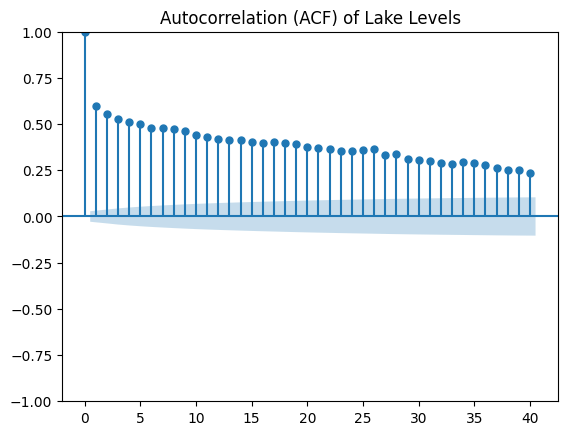

<Figure size 1200x600 with 0 Axes>

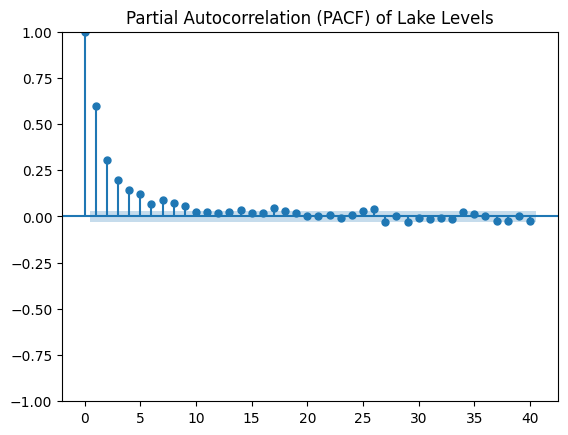

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 1. Plot ACF (Autocorrelation Function)
# ACF plot shows the correlation of the time series with its lagged versions.
plt.figure(figsize=(12, 6))
plot_acf(data['Actual_Lake_Level'], lags=40)  # Adjust lags based on your data
plt.title('Autocorrelation (ACF) of Lake Levels')
plt.show()

# 2. Plot PACF (Partial Autocorrelation Function)
# PACF plot helps to identify the significant lags for the AR (AutoRegressive) model.
plt.figure(figsize=(12, 6))
plot_pacf(data['Actual_Lake_Level'], lags=40)  # Adjust lags based on your data
plt.title('Partial Autocorrelation (PACF) of Lake Levels')
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptlsvyi8l/hw94z84e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptlsvyi8l/9dtkp02d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32675', 'data', 'file=/tmp/tmptlsvyi8l/hw94z84e.json', 'init=/tmp/tmptlsvyi8l/9dtkp02d.json', 'output', 'file=/tmp/tmptlsvyi8l/prophet_modelxotcgu9g/prophet_model-20250617133155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:31:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


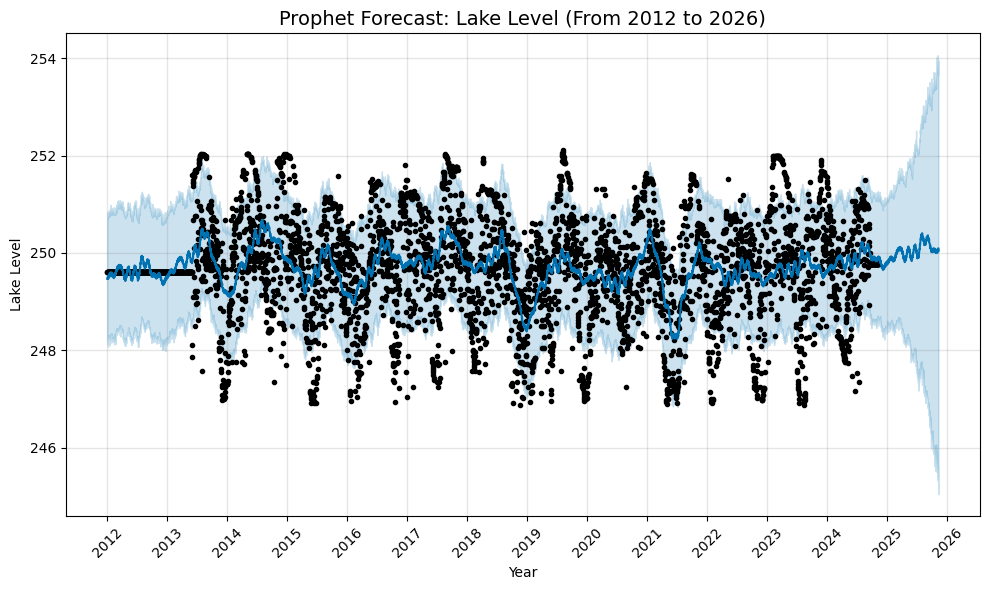

In [ ]:
from prophet import Prophet
import matplotlib.dates as mdates

# Load your updated CSV
df = pd.read_csv("cleaned_lakes_data_2012_daily.csv")

# Convert date and format for Prophet
df['ds'] = pd.date_range(start='2012-01-01', periods=len(df), freq='D')
df['y'] = pd.to_numeric(df['Actual_Lake_Level'], errors='coerce')

# Drop NA and sort
df = df[['ds', 'y']].dropna().sort_values('ds')

# Fit Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(df)

# Make future dataframe for next 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot forecast with proper date formatting
fig = model.plot(forecast)
plt.title("Prophet Forecast: Lake Level (From 2012 to 2026)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Lake Level")
plt.grid(True)

# Format x-axis to show years clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


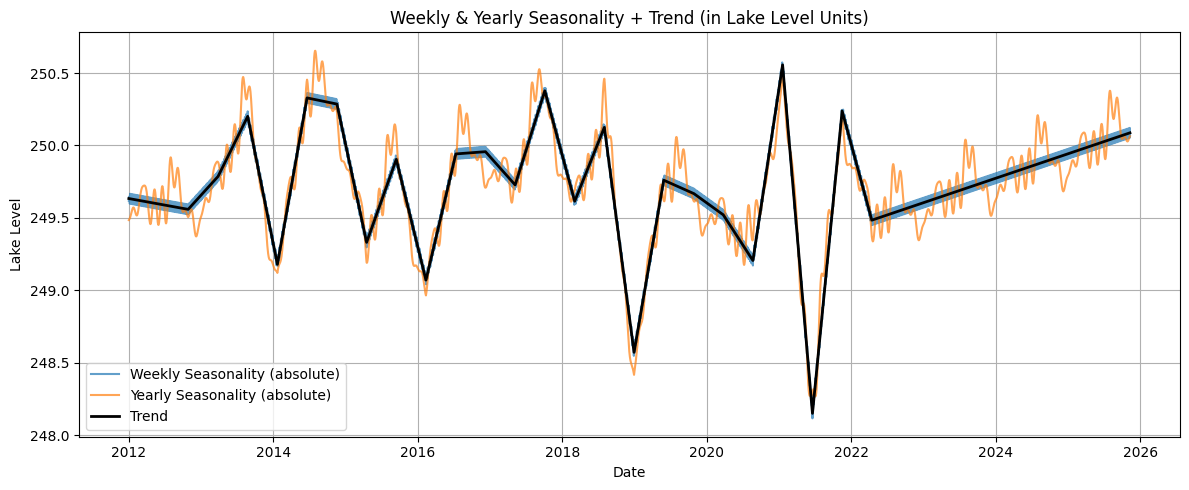

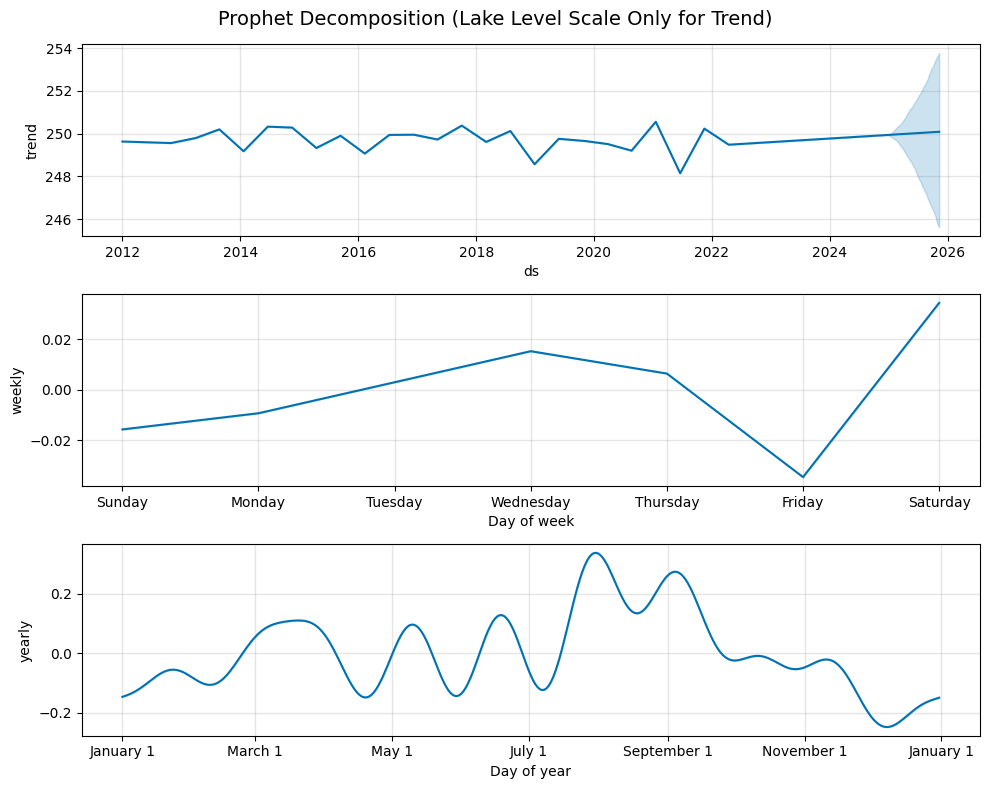

In [ ]:
# Reload and prepare the data
df = pd.read_csv("cleaned_lakes_data_2012_daily.csv")

df['ds'] = pd.date_range(start='2012-01-01', periods=len(df), freq='D')
df['y'] = pd.to_numeric(df['Actual_Lake_Level'], errors='coerce')

# Drop NA and sort
df = df[['ds', 'y']].dropna().sort_values('ds')
# Extract individual components
forecast['weekly_scaled'] = forecast['trend'] + forecast['weekly']
forecast['yearly_scaled'] = forecast['trend'] + forecast['yearly']

# Plot them manually
plt.figure(figsize=(12, 5))
plt.plot(forecast['ds'], forecast['weekly_scaled'], label='Weekly Seasonality (absolute)', alpha=0.7)
plt.plot(forecast['ds'], forecast['yearly_scaled'], label='Yearly Seasonality (absolute)', alpha=0.7)
plt.plot(forecast['ds'], forecast['trend'], label='Trend', color='black', linewidth=2)
plt.title("Weekly & Yearly Seasonality + Trend (in Lake Level Units)")
plt.xlabel("Date")
plt.ylabel("Lake Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


######################


# Re-plot all components using Prophet's native method
fig = model.plot_components(forecast)
fig.set_size_inches(10, 8)
plt.suptitle("Prophet Decomposition (Lake Level Scale Only for Trend)", fontsize=14)
plt.tight_layout()
plt.show()



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptlsvyi8l/jd32nbng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptlsvyi8l/ejpi84wt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35061', 'data', 'file=/tmp/tmptlsvyi8l/jd32nbng.json', 'init=/tmp/tmptlsvyi8l/ejpi84wt.json', 'output', 'file=/tmp/tmptlsvyi8l/prophet_model0365ppyn/prophet_model-20250617133205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model Evaluation:
RMSE: 1.1590
MAE : 0.9058
R²  : -0.2630


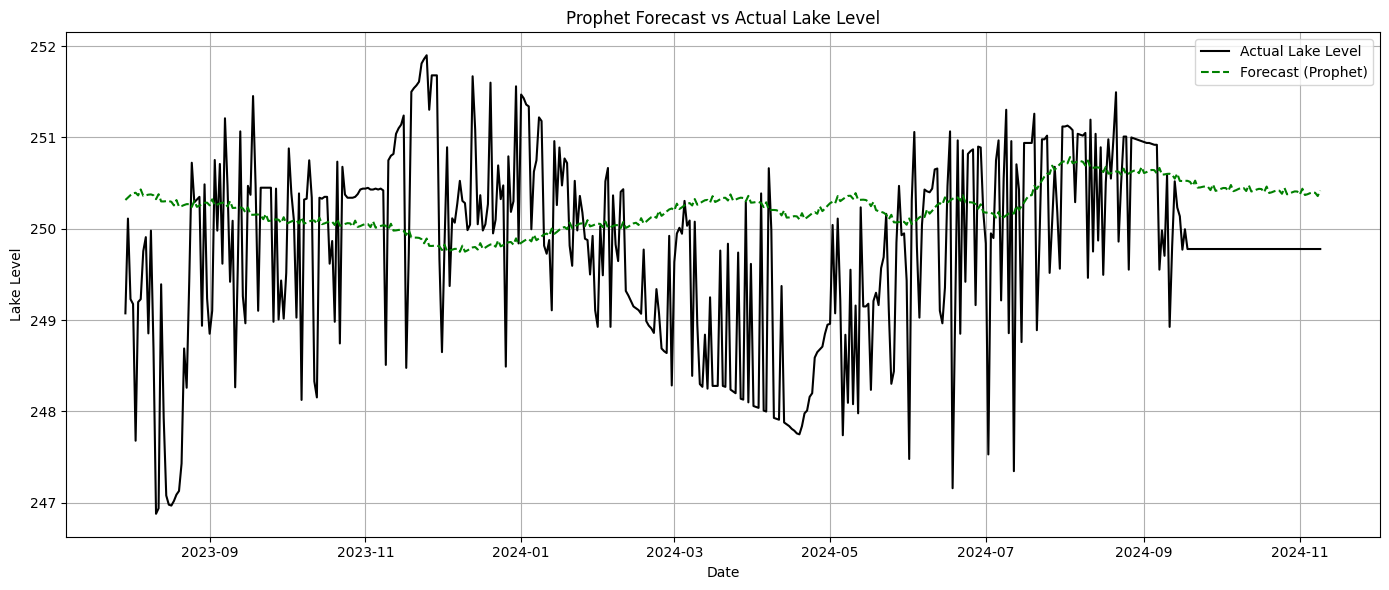

In [ ]:
# Load your updated dataset (with daily dates from 2012 onward)
df = pd.read_csv("cleaned_lakes_data_2012_daily.csv")

# Prepare the data for Prophet
df['ds'] = pd.date_range(start='2012-01-01', periods=len(df), freq='D')
df['y'] = pd.to_numeric(df['Actual_Lake_Level'], errors='coerce')
df = df[['ds', 'y']].dropna()

# Train-test split (e.g., last 10% for test)
test_size = int(len(df) * 0.1)
train_df = df[:-test_size]
test_df = df[-test_size:]

# Fit Prophet model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(train_df)

# Forecast for test set period
future = prophet_model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = prophet_model.predict(future)

# Extract forecasted values for test range
prophet_forecast = forecast.iloc[-len(test_df):]['yhat'].values
y_true = test_df['y'].values

# Evaluation metrics
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

rmse, mae, r2 = evaluate(y_true, prophet_forecast)

# Print results
print("Prophet Model Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

# Plotting forecast vs actual
plt.figure(figsize=(14, 6))
plt.plot(test_df['ds'], y_true, label='Actual Lake Level', color='black')
plt.plot(test_df['ds'], prophet_forecast, label='Forecast (Prophet)', color='green', linestyle='--')
plt.title("Prophet Forecast vs Actual Lake Level")
plt.xlabel("Date")
plt.ylabel("Lake Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


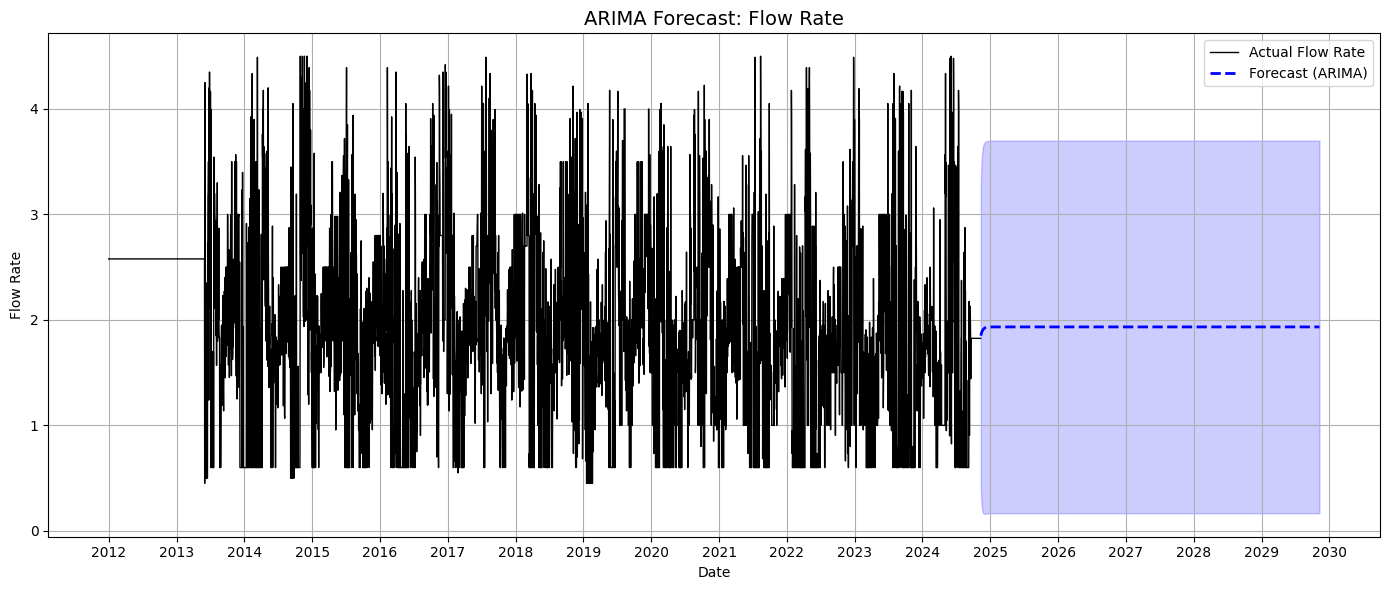

In [ ]:
# Load actual cleaned dataset with real daily flow rate
data = pd.read_csv("cleaned_lakes_data_2012_daily.csv")
data['Date'] = pd.date_range(start='2012-01-01', periods=len(data), freq='D')
data.set_index('Date', inplace=True)

# Use actual flow rate series
flow_series = data['Actual_Flow_Rate']

# Fit ARIMA on real historical data
model_arima = ARIMA(flow_series, order=(1, 0, 1))
model_fit = model_arima.fit()

# Forecast next 5 years (2023-2027 = 5 * 365 = 1825 days)
forecast_steps = 1825
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=flow_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Combine for plotting
plt.figure(figsize=(14, 6))
plt.plot(flow_series.index, flow_series, label='Actual Flow Rate', color='black', linestyle='-', linewidth=1)
plt.plot(forecast_index, forecast_mean, label='Forecast (ARIMA)', color='blue', linestyle='--', linewidth=2)
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='blue', alpha=0.2)

plt.title("ARIMA Forecast: Flow Rate", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Flow Rate")
plt.legend()
plt.grid(True)

# Yearly ticks like Prophet-style
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptlsvyi8l/lwxtan30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptlsvyi8l/beabopg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71409', 'data', 'file=/tmp/tmptlsvyi8l/lwxtan30.json', 'init=/tmp/tmptlsvyi8l/beabopg0.json', 'output', 'file=/tmp/tmptlsvyi8l/prophet_model1rfqerb5/prophet_model-20250617133211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


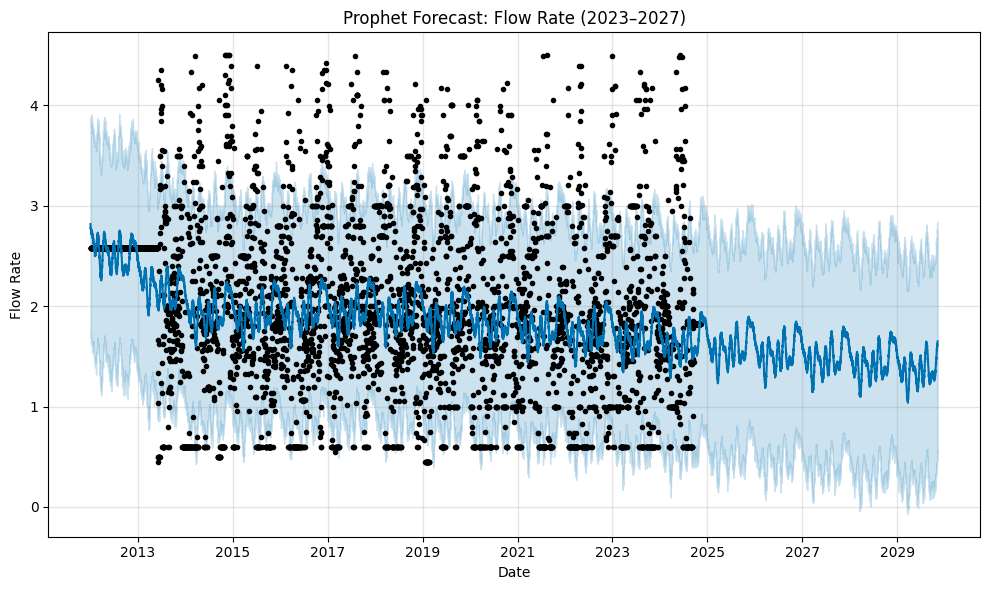

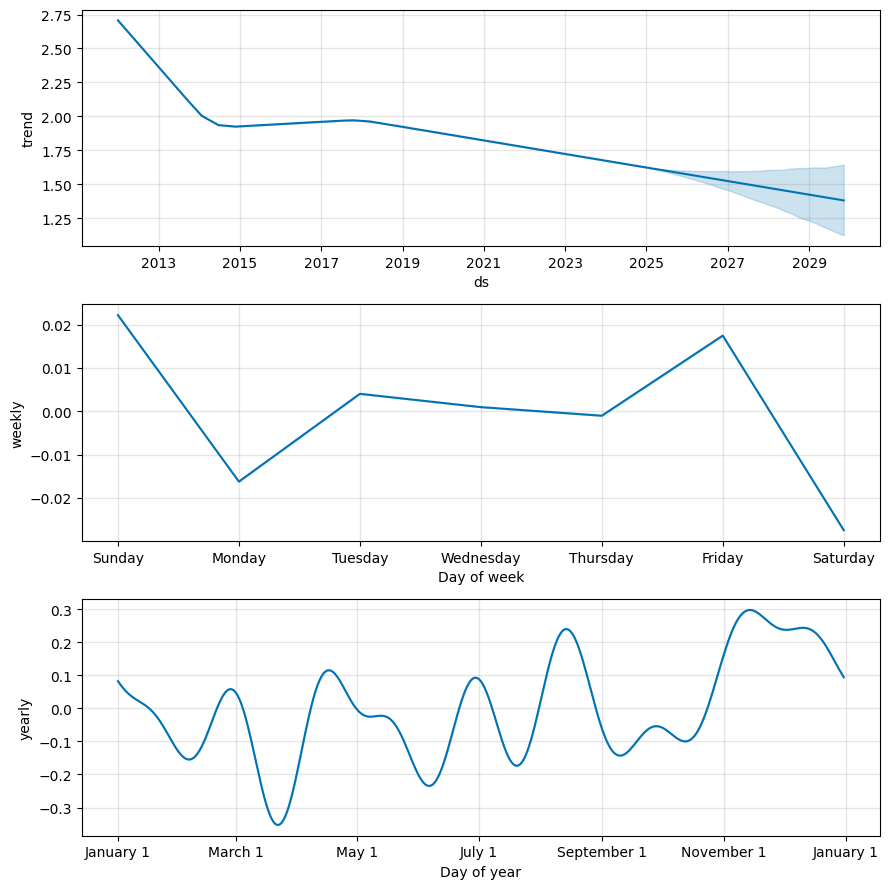

In [ ]:
df = pd.read_csv("cleaned_lakes_data_2012_daily.csv")

df['ds'] = pd.date_range(start='2012-01-01', periods=len(df), freq='D')
df['y'] = pd.to_numeric(df['Actual_Flow_Rate'], errors='coerce')

# Drop NaNs (if any)
df = df[['ds', 'y']].dropna()

# Train/Test Split (optional if you want to evaluate)
# test_size = int(len(df) * 0.1)
# train_df = df[:-test_size]

# Fit Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(df)

# Forecast next 5 years (1825 days)
future = model.make_future_dataframe(periods=1825)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Prophet Forecast: Flow Rate (2023–2027)")
plt.xlabel("Date")
plt.ylabel("Flow Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Plot trend/seasonality breakdowns
model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [ ]:
# Get actual values from the original df (last 1825 days)
actual = df['y'][-1825:].values

# Get predicted values from the forecast
predicted = forecast['yhat'][-1825:].values

# Compute error metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
r2 = r2_score(actual, predicted)

# Print results
print("Prophet Model Evaluation (Flow Rate Forecast 2023–2027):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Prophet Model Evaluation (Flow Rate Forecast 2023–2027):
RMSE: 0.9232
MAE : 0.7298
R²  : -0.0462


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


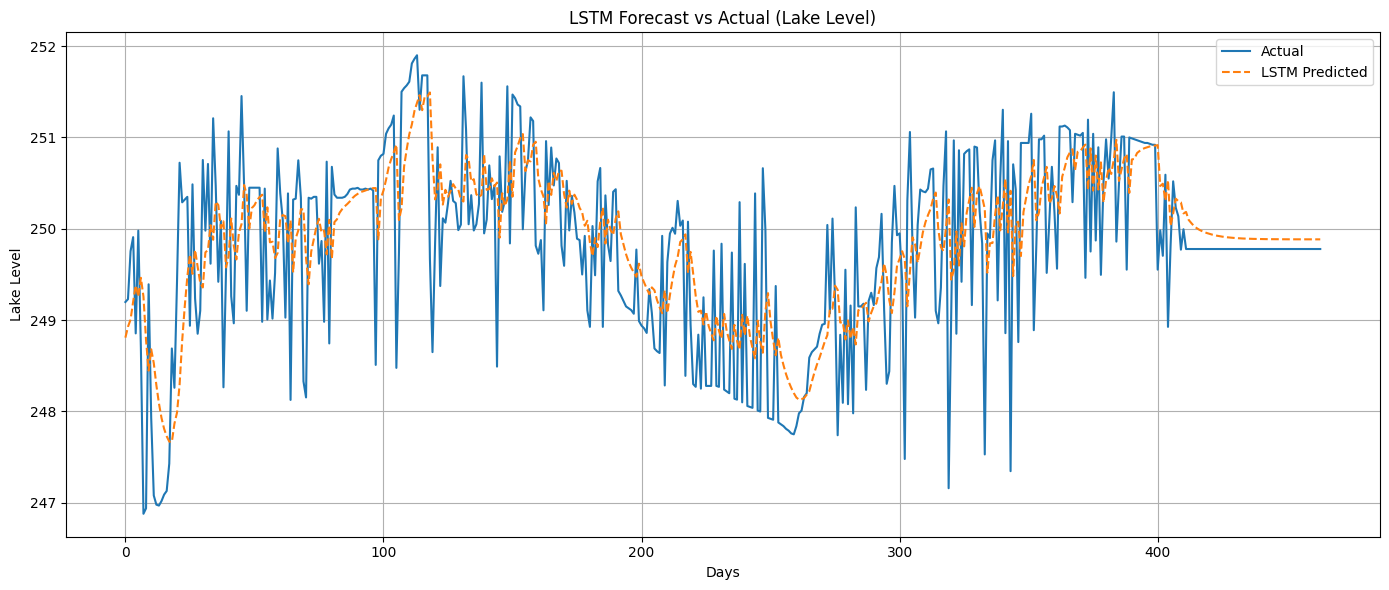


📊 LSTM Evaluation for Lake Level:
RMSE: 0.7935
MAE : 0.6010
R²  : 0.4075


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


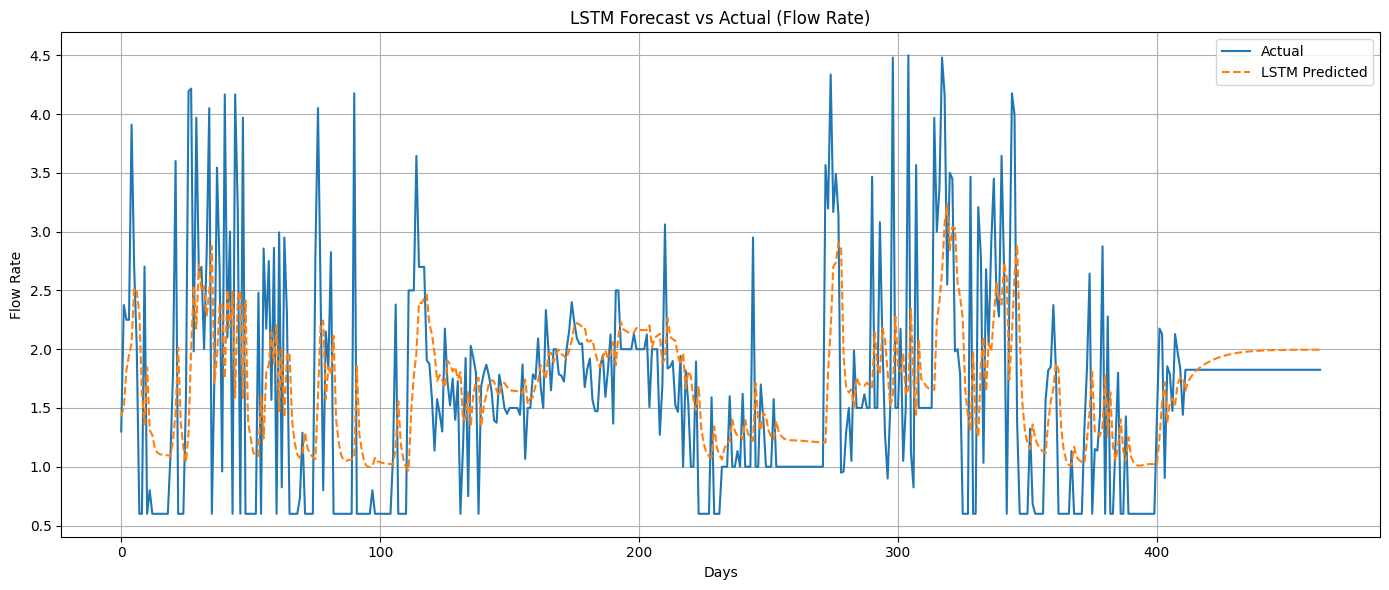


📊 LSTM Evaluation for Flow Rate:
RMSE: 0.8066
MAE : 0.5733
R²  : 0.2015


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

df = pd.read_csv("cleaned_lakes_data_2012_daily.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

### ==================== FUNCTION TO TRAIN & PLOT ====================
def run_lstm_forecast(series, label, sequence_length=60):
    # Remove NaNs
    series = series.dropna().values.reshape(-1, 1)

    # Normalize
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(series)

    # Create sequences
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i])
            y.append(data[i])
        return np.array(X), np.array(y)

    X, y = create_sequences(scaled_data, sequence_length)

    # Train-test split
    split = int(len(X) * 0.9)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


    plt.figure(figsize=(14,6))
    plt.plot(y_test_inv, label='Actual')
    plt.plot(y_pred_inv, label='LSTM Predicted', linestyle='--')
    plt.title(f"LSTM Forecast vs Actual ({label})")
    plt.xlabel("Days")
    plt.ylabel(label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"\n LSTM Evaluation for {label}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")

# ==================== Run for Lake Level ====================
run_lstm_forecast(df['Actual_Lake_Level'], label="Lake Level")

# ==================== Run for Flow Rate ====================
run_lstm_forecast(df['Actual_Flow_Rate'], label="Flow Rate")
